# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Wilson Leonardo
- **Email:** wilsonleonardo4002@gmail.com
- **ID Dicoding:** wileo2004

## Menentukan Pertanyaan Bisnis
Pada tahap ini, kita akan menentukan dan merumuskan masalah dalam bentuk sebuah pertanyaan yang akan dijawab dengan menggunakan analisis data. Pertanyaan dibawah ini dapat digunakan untuk menentukan arah serta tujuan dalam proses bisnis yang akan berjalan secara berkelanjutan.

- Bagaimana perubahan musim mempengaruhi hubungan antara suhu normalisasi dan suhu normalisasi yang dirasakan?
- Apakah ada perbedaan besar dalam penyewaan sepeda pada jam pagi (0-12) dan sore/malam (13-23)?

## Import Semua Packages/Library yang Digunakan
Pada tahap ini, kita mengimpor semua library yang akan digunakan untuk mendukung proses analisis data yang setiap library-nya memiliki peran khusus dalam mempermudah pengolahan, visualisasi serta interaksi dengan data.

In [1]:
import pandas as pd
import seaborn as sns
import streamlit as st
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data
Pada tahap ini, kita mengumpulkan data mentah dari Bike Sharing Dataset untuk memastikan bahwa data berhasil dimuat dan mendapatkan gambaran awal strukturnya.

In [2]:
# Load the data from dataset.csv to DataFrame Pandas
day_df = pd.read_csv('data/day.csv')
# Display the first five rows from DataFrame
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Load the data from dataset.csv to DataFrame Pandas
hour_df = pd.read_csv('data/hour.csv')
# Display the first five rows from DataFrame
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- DataFrame dari `day_df()` berisi data terkait tanggal, musim, tahun, bulan, hari libur, hari masuk, hari bekerja, situasi cuaca, suhu normalisasi, suhu yang dirasakan, kelembapan normal, kecepatan angin, jumlah pengguna kasual, jumlah pengguna terdaftar, jumlah antara pengguna kasual dan terdaftar.
- DataFrame dari `hour_df()` berisi data yang hampir menyerupai dengan `day_df()`, namun yang menjadi perbedaan adalah terdapat data jam. 

### Assessing Data
Pada tahap ini, kita melakukan penilaian data dari DataFrame tersebut untuk memeriksa apakah ada nilai yang hilang atau anomali lainnya.

In [4]:
# Display the result of checking for missing values or another anomaly
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Display the result of checking for missing values or another anomaly
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Kedua DataFrame tersebut tidak memiliki nilai yang hilang maupun anomali, serta semua kolom memiliki tipe data yang sesuai.

### Cleaning Data
Pada tahap ini, kita melakukan pembersihan data dari DataFrame untuk mengatasi nilai yang hilang, duplikasi atau anomali lainnya. Namun karena pada tahap sebelumnya menghasilkan data yang sudah bersih, maka kita dapat melewati tahap ini.

In [6]:
# Since the data is clean, we can skip this step

## Exploratory Data Analysis (EDA)
Pada tahap ini, kita mengeksplorasi data di DataFrame secara visual maupun statistik menggunakan berbagai teknik dan parameter dalam _descriptive statistics_ untuk menemukan pola, hubungan, serta membangun intuisi.

### Explore `hour_df`
Tahap pertama, kita akan mencari deskripsi statistik dasar dari DataFrame `hour_df` karena data tersebut hampir mirip dengan `day_df` tetapi lengkap. 

In [7]:
# To get a summary of the DataFrame
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tahap kedua, kita dapat membuat heatmap untuk korelasi hubungan antar variable.

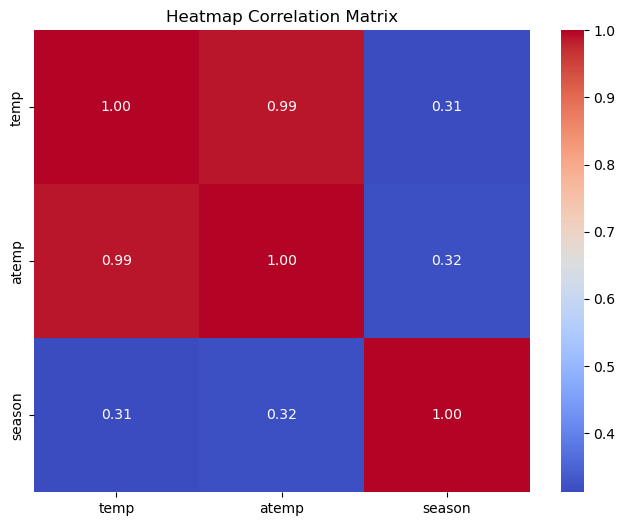

In [8]:
# To get a heatmap correlation matrix
correlation_matrix = hour_df[['temp', 'atemp', 'season']].copy()
correlation_matrix['season'] = correlation_matrix['season'].astype('category').cat.codes
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap Correlation Matrix')
plt.show()

**Insight:**
- Rata-rata jam menunjukkan sekitar 11.546752 sehingga dapat dikatakan bahwa waktu penyewaan di Pagi hari akan cenderung lebih tinggi daripada Sore/Malam hari.
- Rata-rata suhu normalisasi menunjukkan sekitar 0.496987 dan suhu normalisasi yang dirasakan menujukkan sekitar 0.475775 sehingga dapat dikatakan bahwa suhu normalisasi yang dirasakan akan sedikit lebih rendah daripada suhu normalisasi.

## Visualization & Explanatory Analysis
Pada tahap ini, kita akan melakukan visualisasi berdasarkan DataFrame yang telah ditentukan sebelumnya serta digunakan untuk menjawab dari pertanyaan bisnis yang sudah dikembangkan dari awal dalam bentuk visual. 

### Pertanyaan 1: Bagaimana perubahan musim mempengaruhi hubungan antara suhu normalisasi dan suhu normalisasi yang dirasakan?

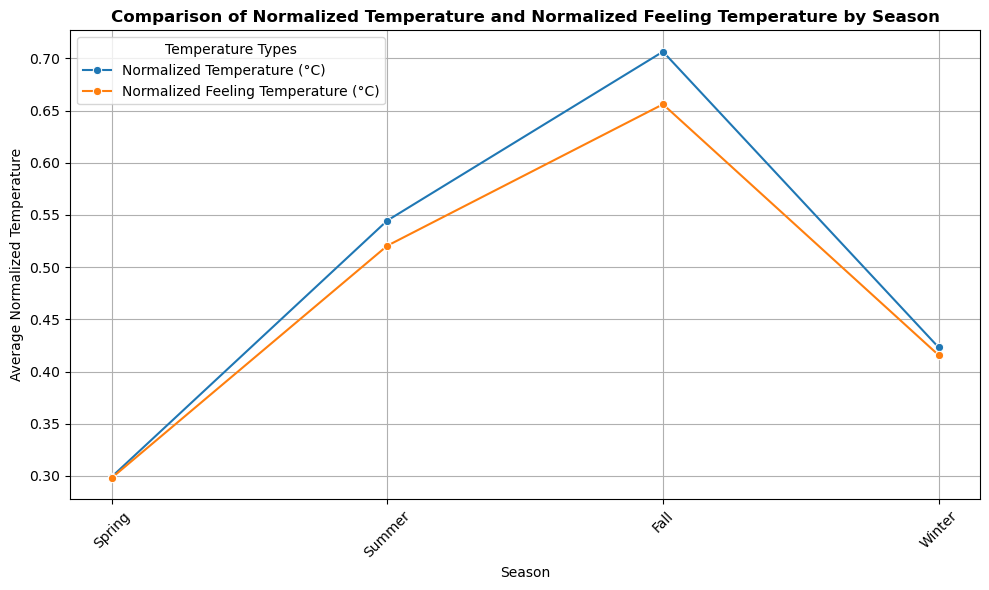

In [9]:
# Create a mapping for seasons to readable labels
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season'] = hour_df['season'].map(season_mapping)

# To create an order of seasons
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
hour_df['season'] = pd.Categorical(hour_df['season'], categories=season_order, ordered=True)

# Calculate the average normalized temperature and normalized feeling temperature for each season
average_temp = hour_df.groupby('season', observed=False).agg({'temp': 'mean', 'atemp': 'mean'}).reset_index()

# Melt the DataFrame for easier plotting
average_temp_melted = average_temp.melt(id_vars='season', value_vars=['temp', 'atemp'],
                                         var_name='Temperature Types', value_name='Average Temperature')

# To replace the temperature type label to be readable by the general public
average_temp_melted['Temperature Types'] = average_temp_melted['Temperature Types'].replace({
    'temp': 'Normalized Temperature (°C)',
    'atemp': 'Normalized Feeling Temperature (°C)'
})

# To create a line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_temp_melted, x='season', y='Average Temperature', hue='Temperature Types', marker='o')
plt.title('Comparison of Normalized Temperature and Normalized Feeling Temperature by Season', fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Average Normalized Temperature')
plt.grid()
plt.xticks(rotation=45)
plt.legend(title='Temperature Types')
plt.tight_layout()

plt.show()

### Pertanyaan 2: Apakah ada perbedaan besar dalam penyewaan sepeda pada jam pagi (0-12) dan sore/malam (13-23)?

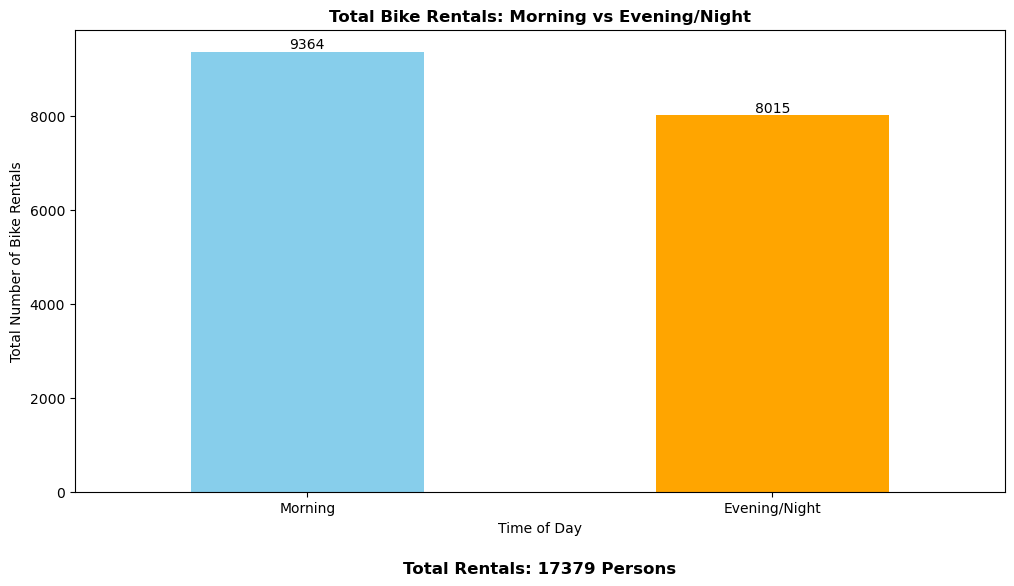

In [10]:
# Create a new column to interpret hours as day type
hour_df['time_of_day'] = hour_df['hr'].apply(lambda x: 'Morning' if x <= 12 else 'Evening/Night')

# Set the order from morning to evening/night
hour_df['time_of_day'] = pd.Categorical(hour_df['time_of_day'], categories=['Morning', 'Evening/Night'], ordered=True)

# To create a bar graph
total_rentals = hour_df.groupby('time_of_day', observed=False)['cnt'].count()

plt.figure(figsize=(12, 6))
bars = total_rentals.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Total Bike Rentals: Morning vs Evening/Night', fontweight='bold')
plt.xlabel('Time of Day')
plt.ylabel('Total Number of Bike Rentals')
plt.xticks(rotation=0)

# To create exact values ​​in a bar graph
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        int(bar.get_height()),
        ha='center',
        va='bottom'
    )

# Calculate and display the overall total rentals
total_rentals_sum = total_rentals.sum()
plt.text(0.5, -0.15, f'Total Rentals: {total_rentals_sum} Persons',
         ha='center', va='top', transform=plt.gca().transAxes, fontsize=12, color='black', fontweight='bold')

plt.show()

**Insight:**
- Berdasarkan hasil dari visualisasi pertama, membuktikan bahwa pada musim Spring, Summer dan Fall mengalami peningkatan yang signifikan namun terjadi penurunan secara drastis pada musim Winter.
- Berdasarkan hasil dari visualisasi kedua, membuktikan bahwa penyewaan sepeda di Pagi hari lebih mendominasi daripada Siang/Malam hari.

## Conclusion

- Kesimpulan dari pertanyaan ke-1 adalah perubahan musim cenderung mengalami perubahan suhu normalisasi dan suhu normalisasi yang dirasakan secara signifikan, terlihat bahwa suhu normalisasi meningkat secara konsisten dari musim Spring ke musim Summer dan mencapai puncaknya pada musim Fall, sebelum menurun di musim Winter. Hal ini menunjukkan bahwa suhu normalisasi dan suhu normalisasi yang dirasakan oleh individu dipengaruhi oleh kondisi musim atau faktor lingkungan.
- Kesimpulan dari pertanyaan ke-2 adalah total penyewaan sepeda di Pagi hari cenderung lebih tinggi menghasilkan nilai sebesar 9364 orang dibandingkan Sore/Malam hari yang menghasilkan nilai 8015 orang sehingga dapat memungkinkan karena disebabkan oleh faktor tertentu seperti hari masuk atau rutinitas Pagi hari dimana orang cenderung menggunakan sepeda untuk berangkat bekerja, berangkat sekolah maupun berolahraga. Sebaliknya, penyewaan di Sore/Malam hari cenderung lebih rendah juga dapat memungkinkan karena disebabkan oleh faktor tertentu seperti suhu yang cukup dingin di malam hari dan sebagainya.